#### 공부시간에 따른 점수 예측하기
- 목표 : 공부시간으로 점수 예측
- 데이터셋 : 임의의 생성
- 피쳐/속성 : 공부시간
- 타겟 : 점수
- 학습방법 : 지도학습 > 회귀
- 학습알고리즘 : 선형회귀 <== [조건] 데이터의 분포가 선형분포여야함!

[1] 데이터 준비

In [2]:
# 14개의 데이터셋
jumsu = range(7,100,7)
len(jumsu), jumsu[-1]

hour=range(1,29,2)
len(hour)

14

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# List => DataFrame으로 변환
hourDF=pd.DataFrame(hour,columns=['Hour'])
hourDF.head()

jumsuDF=pd.Series(jumsu)
jumsuDF.head()

0     7
1    14
2    21
3    28
4    35
dtype: int64

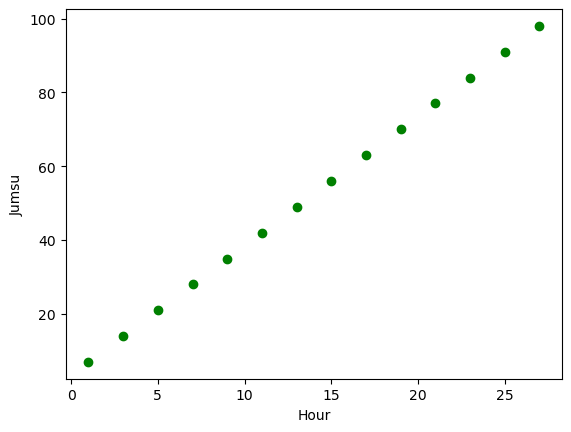

In [4]:
### 현재 데이터의 분포 확인
plt.plot(hourDF,jumsuDF,'go')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

[2] 모델 생성 및 학습 진행

In [5]:
# 모듈 로닝
from sklearn.linear_model import LinearRegression

In [6]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [7]:
# 학습 진행 => 최대한 많은 데이터를 직선의 기울기와 절편 찾기
model.fit(hourDF,jumsuDF)

LinearRegression()

In [8]:
# 학습 후 모델 파라미터
print(f'기울기 : {model.coef_} 절편 : {model.intercept_}')

기울기 : [3.5] 절편 : 3.500000000000007


In [9]:
# y = ax + b
pre_jumsu = model.coef_[0]*hourDF + model.intercept_
pre_jumsu = pre_jumsu.values.reshape(-1)

In [10]:
# 실제 점수와 예측 점수 차이
real_jumsu = jumsuDF.to_numpy()
real_jumsu - pre_jumsu

array([-7.10542736e-15, -5.32907052e-15, -3.55271368e-15, -3.55271368e-15,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

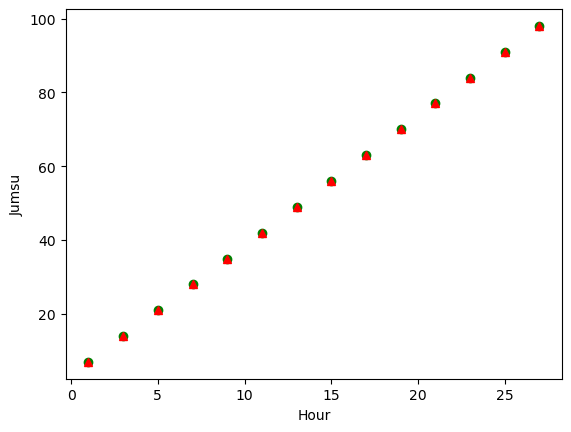

In [11]:
### 현재 데이터의 분포 확인
plt.plot(hourDF,jumsuDF,'go',label="Real Jumsu")
plt.plot(hourDF,pre_jumsu,'r^',label='Predict jumsu')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

[3] 모델 성능 평가

In [12]:
model.score(hourDF,jumsuDF)

1.0

In [13]:
### 오차 계산 즉, 손실 / 비용 함수 확인
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
#  root_mean_squared_error => version 1.4 이상

In [14]:
import sklearn
sklearn.__version__

'1.5.1'

In [15]:
pre_y = model.predict(hourDF)

In [16]:
jumsuDF

0      7
1     14
2     21
3     28
4     35
5     42
6     49
7     56
8     63
9     70
10    77
11    84
12    91
13    98
dtype: int64

In [17]:
mse = mean_squared_error(jumsuDF,pre_y)
rmse = mean_squared_error(jumsuDF,pre_y,squared=False)
mae = mean_absolute_error(jumsuDF,pre_y)
r2 = r2_score(jumsuDF,pre_y)

c:\Users\KDP-14\anaconda3\envs\samban\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
# 손실/비용 함수 값은 0에 가까울수록
# 결정계수(R-score) 값은 1에 가까울수록 성능 좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 7.437831392083826e-30
rmse : 2.727238785307188e-15
mae : 1.395708945243054e-15
r2 : 1.0
